# TMDB anlysis 

in this project i will be analysing the tmdb data set i will be trying to go through the data analysis steps we learned in the udacity data analysis advanced track which are:

1) stating questions

2) data wrangling

3) data exploration or EDA

4) drawing conclusions 

5) communicating the conclusions 


In [136]:
#imports and reading the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

### Staing questions:

In this step of the process we will be trying to look for interesting inqueries that we think can be fulfilled given the data. So I will prentend I want to make a movie adn by analysing this data I will try to find as much information about the movie I want to make before even writing the script. Thats what I will be basing my Questions on.

Questions:

1) are some genres more profitable than others ?

2) does length of title affect popularity ?

3) does runtime affect popularity ?

4) does popularity actually represent profit ?

5) what are the most profitable times of the year for movies ?


### Data wrangling and exploration

in this phase we will take on the second and third step of the data analysis process since they are interchangable and alot of the time they are done recursivley. We will attempt to clean the data and explore it.


In [137]:
#gettin feel for the data 
# show the dimensions of the data 
df.shape

(10866, 21)

In [138]:
#prints out a list of column names 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [139]:
#shows the firt 5 rows of the data 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [140]:
#information about each column's data type count and non null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [141]:
#to describe the data's quantiles and some other statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [142]:
#checking for duplicates 
sum(df.duplicated())

1

In [143]:
#a function to help me find the numerical columns to make the data exploration easier.
numerical = []
categorical = []

def parser(data):
    for i in data.columns:
        if data[i].dtype == 'int64' or data[i].dtype == 'float64':
            numerical.append(data[i])
            print(f"{i} is numerical")
        else:
            categorical.append(data[i])
            print(f"{i} is not numerical")


In [144]:
parser(df)

id is numerical
imdb_id is not numerical
popularity is numerical
budget is numerical
revenue is numerical
original_title is not numerical
cast is not numerical
homepage is not numerical
director is not numerical
tagline is not numerical
keywords is not numerical
overview is not numerical
runtime is numerical
genres is not numerical
production_companies is not numerical
release_date is not numerical
vote_count is numerical
vote_average is numerical
release_year is numerical
budget_adj is numerical
revenue_adj is numerical


In [145]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### observations

1) many columns are not of use so we will remove them

2) the data frame has many multi value columns so we will need to clean that up

3) some null values that need to be handeld 

4) we want the release date to be a date/time type 

5) some outliers need to be checked I doubt that there is a movie that is 0 minutes long that would be a waste of money to say the least or movies with 0 budgets granted they seem more plausible but we have to check 

6) lastly the one duplicate that needs to be removed



### Fixing the problems with the data:

In [146]:
#removing irrelevant columns 
dropped = ['revenue', 'budget', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies']
df = df.drop(columns = dropped )

In [147]:
df.tail()

,id,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,74,Horror,11/15/66,15,1.5,1966,127642.279154,0.0


#### Multi valued columns 
fixing the multi valued columns now we have to fix 2 columns cast and genres by finding the star of the movie and finding the genres of the movies into seperate columns. 

In [148]:
#splittting the strings of cast to a column for the  stars of the movies

df['star'] = df.cast.str.split('|', expand = True)[0]

#making sure it worked 
df.head()

,id,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [149]:
#now to do the same with genres 
df['genre_1'] = df.genres.str.split('|', expand = True)[0]
df['genre_2'] = df.genres.str.split('|', expand = True)[1]
df['genre_3'] = df.genres.str.split('|', expand = True)[2]

#checking 
df.head()

,id,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star,genre_1,genre_2,genre_3
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure,Science Fiction
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction,Thriller
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure,Science Fiction
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime,Thriller


In [150]:
#dropping the original columns 
dropped2 = ['genres', 'cast']
df.drop(columns = dropped2, inplace = True)

In [151]:
df.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star,genre_1,genre_2,genre_3
0,135397,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure,Science Fiction
2,262500,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction,Thriller
3,140607,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure,Science Fiction
4,168259,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime,Thriller


In [152]:
df.isna().sum()

id                   0
popularity           0
original_title       0
runtime              0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
star                76
genre_1             23
genre_2           2351
genre_3           5787
dtype: int64

#### Observations :
so after the new adjustments we find that over half the movies dont have a third genre so we will just remove that column and other columns we will treat the missing values as there own category.

In [153]:
#dropping the third genre column
df.drop(columns = ['genre_3'], inplace = True)

In [154]:
#chechink for na values in each column
df.isna().sum()

id                   0
popularity           0
original_title       0
runtime              0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
star                76
genre_1             23
genre_2           2351
dtype: int64

In [155]:
#dropping na values in 2 columns 
df.dropna(subset=['star', 'genre_1'], inplace = True)

In [156]:
#checking the na values 
df.isna().sum()

id                   0
popularity           0
original_title       0
runtime              0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
star                 0
genre_1              0
genre_2           2285
dtype: int64

#### Observation :
For the second genre coulumn there are too many na values to drop that many rows so we should just replace these values by the values in the first genre column.

In [157]:
df.genre_2.fillna(df['genre_1'], inplace = True)

In [158]:
#is'nt that a site to behold zeros all the way 
df.isna().sum()

id                0
popularity        0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
star              0
genre_1           0
genre_2           0
dtype: int64

In [159]:
#removing the duplicates 
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [160]:
#handling outliers
df['runtime'].replace(0, df.runtime.median(), inplace = True)
df[df['runtime']==0].count()

id                0
popularity        0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
star              0
genre_1           0
genre_2           0
dtype: int64

In [161]:
#changing the date column type 
df['release_date'] = pd.to_datetime(df['release_date'])

### Drawing conclusions and Communicating them  :

now we will be trying to answer the questions stated above through some data exploration and visualisations 

#### Question 1:  are some genres more profitable than others  ?

In [162]:
#creating a profit column
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star,genre_1,genre_2,profit
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure,2.101614e+08
2,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure,1.718723e+09
4,168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime,1.210949e+09


In [163]:
#checking how many genres are there
df.genre_1.nunique()

20

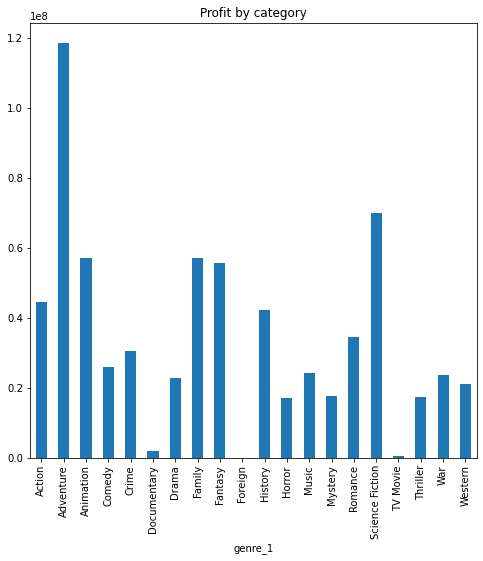

In [164]:
#plotting mean of profitability against genre 
df.groupby('genre_1')['profit'].mean().plot(kind = 'bar', figsize = (8,8), title = 'Profit by category');

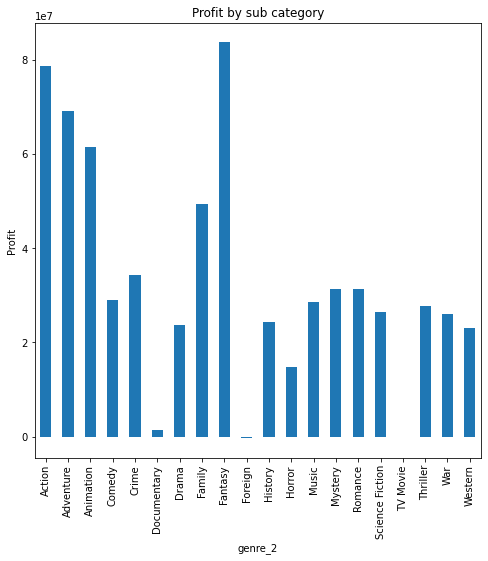

In [181]:
#plotting second genres with profit
df.groupby('genre_2')['profit'].mean().plot(kind = 'bar', figsize = (8,8),title = 'Profit by sub category');
plt.ylabel('Profit');

#### Conclusion 1:

most profitable movies are mainly catgorized under adventure movies with them averagin 120 million in profits in the second plot for the second genre we see that the movies that are most profitable are of the side genre fantasy.

#### Question 2: does title length affect popularity ?


In [166]:
#creating title_length coulmn 
df['title_length'] = df.original_title.str.len()
df.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star,genre_1,genre_2,profit,title_length
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure,1.254446e+09,14
1,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure,2.101614e+08,18
2,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction,1.704191e+08,9
3,140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure,1.718723e+09,28
4,168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime,1.210949e+09,9


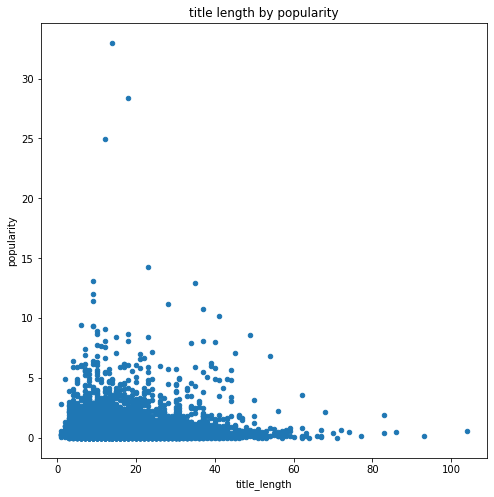

In [167]:
#plotting title length with popularity
df.plot(x = 'title_length', y = 'popularity', kind = 'scatter', figsize = (8,8), title = 'title length by popularity');

In [168]:
#seeing the numerical value for the correllation of the 2 variables 
df['title_length'].corr(df['popularity'])

-0.0037852506031685004

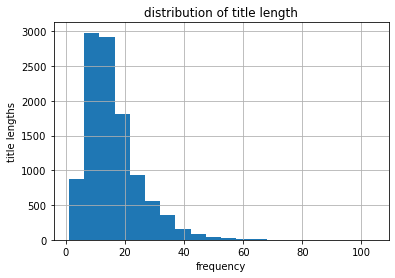

In [169]:
#distribution of title length 
df['title_length'].hist(bins = 20);
plt.title('distribution of title length');
plt.ylabel('title lengths');
plt.xlabel('frequency');

#### conclusion 2 : 
as the plot shows there is no correllation between the length of the title and the movie popularity, Just to make sure I printed out the correllation which came out unsurprisingly almost 0. Plotting the distribution of the other movies showed that the vast majority of movies have 10 to 20 charachters in the movie title.

#### Question 3 : does runtime affect popularity ?

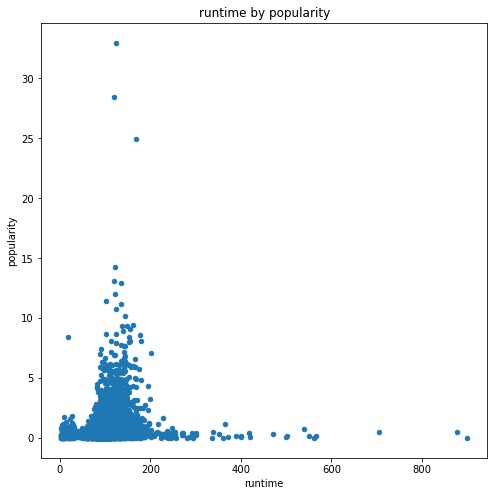

In [170]:
df.plot(x = 'runtime', y = 'popularity', kind = 'scatter', figsize = (8,8), title = 'runtime by popularity');

In [171]:
df['runtime'].corr(df['popularity'])

0.13479193889273183

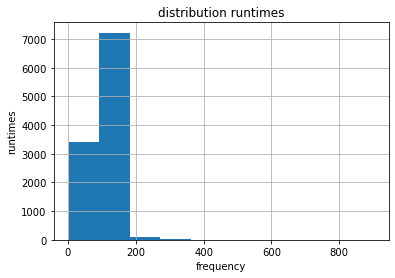

In [172]:
df['runtime'].hist();
plt.title('distribution runtimes');
plt.ylabel('runtimes');
plt.xlabel('frequency');

In [173]:
#average runtime 
df['runtime'].mean()

102.68923562737996

#### conclusion 3:
we see correllation between the 2 variables with 0.13 being the amount of correllation which leads as to prefer larger sized movies for the positive correllation but not that much to base our descision off of so the distribution also showed that average runtime of movies is between 100 and 200 minutes and the mean was actually 102.

#### Question 4 :  does popularity actually represent profit ?
sometimes popularity and how much people liked a movie does not mean it was profitable so we will see if that is a rare occurrance or is that something that we have to take into consideration while making the movie.

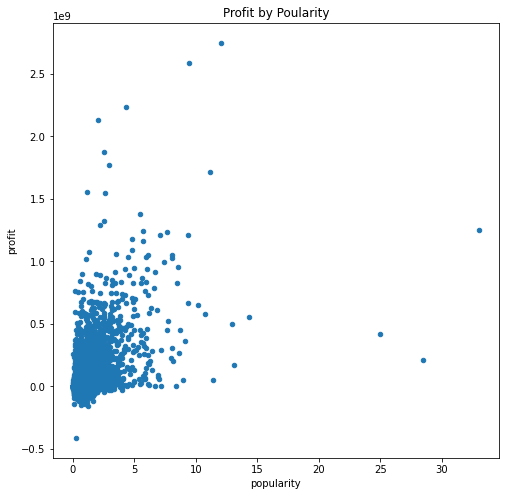

In [174]:
#plotting popularity against profit
df.plot(x = 'popularity', y = 'profit', kind = 'scatter', figsize = (8,8), title = 'Profit by Poularity');

In [175]:
#printing correllation of profit and popularity 
df['profit'].corr(df['popularity'])

0.5624988515577675

#### conclusion 4:
so actually the profit and popularity have a corraltion that is mid level positive correlation we can see from the plot that they tend to rise together but not always hence the correlation not being very strong that means that we need to be careful becaucse a profitable movie is not always profitable and vice versa

#### Question 5: what are the most profitable times of the year for movies ?


In [176]:
#creating a release_month column
df['release_month'] = df.release_date.dt.month
df.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,star,genre_1,genre_2,profit,title_length,release_month
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure,1.254446e+09,14,6
1,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure,2.101614e+08,18,5
2,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction,1.704191e+08,9,3
3,140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure,1.718723e+09,28,12
4,168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime,1.210949e+09,9,4


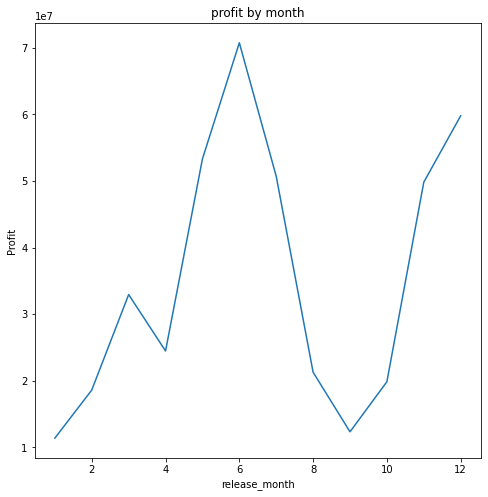

In [179]:
#plotting profitability by time 
df.groupby('release_month')['profit'].mean().plot(kind = 'line', figsize = (8,8), title = 'profit by month');
plt.ylabel('Profit');


#### Conclusion 5: 
the data and the plot show that highest average profit occurs in the months of june and december with june being higher which makes sense since it's the beginning of the summer.

## Communicating the conclusions:

In this step I will summarize the conclusions we came to from this analysis. Firstly our movie to have the best chances of being profitable we should make it an adveture fantasy film ,with a title length that is 10 to 20 characters long and a runtime of 120 minutes.We need to focus on the movie being popular so popularity means marketing and likable actors to star in the movie.Lastly the movie should be released in june or december to have the best chances of making money. 

### Limitations of the data :
the data has some limitations of course that  need to be addressed like the way the popularity variable is calculated which might not be the only or the best way to calculate it. The movie title variable since not all movies have the same title every where.Same with release date not all movies are released in all countries at the same time. Finally not all movies are voted on sufficiently to give the metrics relevant to this variable enough credebility.